In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
from matplotlib import rcParams

In [2]:
df = pd.read_csv('../data/clean/acs_income.csv')

In [3]:
df.columns

Index(['year', 'borough', 'zipcode', 'households_s1901_total_population',
       'households_s1902_total_population', 'households_median_income',
       'households_s1901_mean_income', 'households_s1902_mean_income',
       'families_total_population', 'families_median_income',
       'families_mean_income', 'married_couple_families_total_population',
       'married_couple_families_median_income',
       'married_couple_families_mean_income',
       'nonfamily_households_total_population',
       'nonfamily_households_median_income',
       'nonfamily_households_mean_income', 'resident_total_population',
       'resident_mean_income', 'white_total_population', 'white_mean_income',
       'african_american_total_population', 'african_american_mean_income',
       'amer_indian/alaska_native_total_population',
       'amer_indian/alaska_native_mean_income', 'asian_total_population',
       'asian_mean_income', 'hawaiian/_pacific_islander_total_population',
       'hawaiian/_pacific_islan

In [19]:
g = df.groupby(['zipcode','year','borough'])[['latino_mean_income','white_mean_income','white_alone(not_latino)_mean_income']].mean().reset_index()
manhattan=g[g['borough']=='Manhattan']
brooklyn=g[g['borough']=='Brooklyn']

<AxesSubplot:xlabel='year', ylabel='latino_mean_income'>

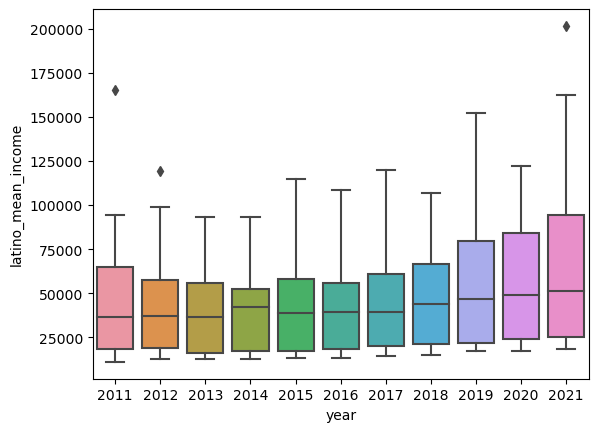

In [17]:
sns.boxplot(data=manhattan, x='year', y='latino_mean_income')

<AxesSubplot:xlabel='year', ylabel='latino_mean_income'>

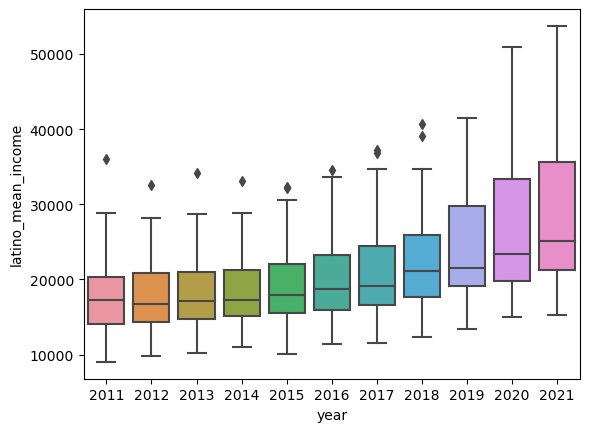

In [20]:
sns.boxplot(data=brooklyn, x='year', y='latino_mean_income')

<AxesSubplot:xlabel='year', ylabel='white_mean_income'>

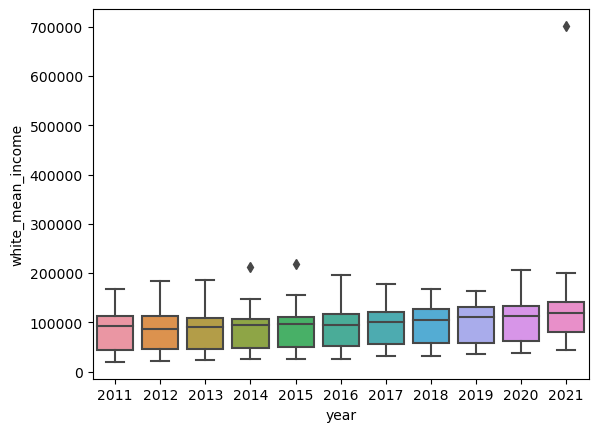

In [18]:
sns.boxplot(data=manhattan, x='year', y='white_mean_income')

<AxesSubplot:xlabel='year', ylabel='white_mean_income'>

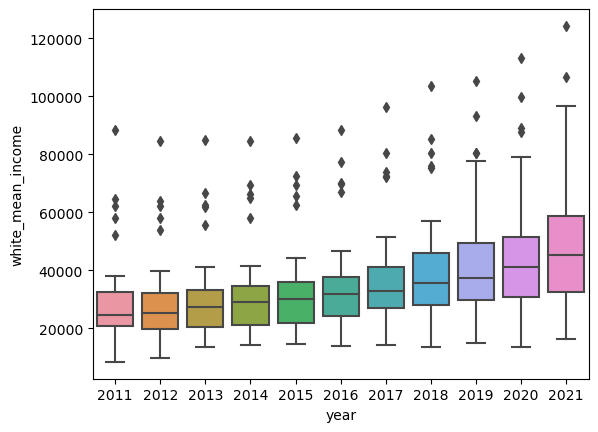

In [21]:
sns.boxplot(data=brooklyn, x='year', y='white_mean_income')